___
## The validity of implicit biases we have for performance differences between men and women of various ages   

____

**Introduction**  

The purpose of this research was to determine how age and gender affect placement during a half marathon in Mount Desert, Maine. While much of the historical gender stereotypes are old history, one common one that remains is the idea that men are more athletic than women. Another stereotype is that younger athletes perform better than older athletes. In order to investigate this, a data set of 500 runners was used from a half marathon in Mount Desert Island, Maine. The subjects were of all ages, both men and women. The hypotheses were set according to historical assumptions to determine their validity.  

Gender has been studied within marathon runners, with the gender gap potentially decreasing between gender and finish place (Sparling et al. 1998). While the gender gap has decreased, there is still strong evidence that on average, men have a faster pace than women during marathons. The results from this paper looked at the proportion of females that placed within the top 100 and 50 runners, as well as their placement within all 500 runners. It was predicted that there would be a gender gap in the top 50 runners, but the relative proportion of male and female runners would be somewhat similar in the later places.  

Several studies have reported that age is related to time to completion of both marathons and half marathons (Leyk et al. 2007). Age was investigated within the data set by looking at the distribution of age amongst males and females, as well as against place. It was hypothesized that increasing age would negatively affect placement (increased age would lead to increased placement). A study in 2013 found that there is a lower participation rate in women of older age compared to men in the same age range (Hunter and Stevens 2013), therefore it was predicted that of the two genders, men would have a larger proportion of older age groups relative to women.  

To test these hypotheses, the data set from Maine was studied and portrayed in several different formats. The results would therefore determine if the biases, which may be implicit, that we have, are valid according to the marathon results.  

A quote, found on the source page, from Josh, the creator and owner of the data:  
"PAGE CREATED BY JOSH MERLIS of ARE Event Productions.
All rights reserved. Do not copy or modify this without his permission, or else you will never PR again!
Love,
Josh :)".   

Sorry Josh.


In [154]:
library(rvest)
library(ggplot2)

**Methods**

*Scraping the HTML*

    1) Gaining access to the data set using the Half Marathon results from the Mouse Desert Island Marathon (2018)  
    2) Specifically extracts the data at the html node "td": this data was extracted from the table of results 
    3) Takes the html_text, unlists it, puts into a matrix, and puts it into a dataframe with a specific number of   rows and columns  
    4) Numerically reorganizes the columns based on the number associated in the original dataframe  
    5) Renames the columns according to the order that they were organized in step 4  
    6) Displays only the first 6 columns so that I only have the data I specifically want to work with  
    

In [170]:
#1) 
marathon = read_html("http://www.areep.com/results/live/overall.php?eid=37&rid=79")

#2)
marathon1 = marathon %>% html_nodes('td') %>% html_text() 

#3)
marathondf <- data.frame(matrix(unlist(marathon1), ncol=16, nrow=500, byrow=16))  

#4)
marathonnew = marathondf[,c(1,11,5,4,3,15,16,2,8,6,7,9,10,12,13,14)]

#5)
colnames(marathonnew) = c("Place","Sex_Place","Sex","Age","Name","Net_Time","Net_Pace","Bib","DIV","City",
"State","DIVPLACE","DIVTOTAL","SEXTOTAL","NETTIME","NETPLACE") 

#6)
marathonnew[7:16] <- list(NULL) #null stops the dataframe from listing the 7th through 16th column
head(marathonnew)

Place,Sex_Place,Sex,Age,Name,Net_Time
1,1,M,29,Alex Russeau,1:08:16
2,2,M,30,Eric Ashe,1:08:21
3,3,M,30,Jonny Wilson,1:08:33
4,4,M,35,Rob Gomez,1:10:46
5,5,M,32,Shaun Donegan,1:15:14
6,6,M,47,Rico Portalatin,1:16:52


**Methods**  
*Reclassifying the data*  

    7) Place, Sex_Place, and Age were all reclassified from factors to characters, than to numerical data in order   to maintain the original order of the dataframe when used in plots.  
    8) Sex and Net_Time were reclassified from factors to characters. 

In [171]:
#7)
marathonnew$Place = as.character(marathonnew$Place) #Place: factor to character
marathonnew$Place = as.numeric(marathonnew$Place) #Place: character to numeric
marathonnew$Sex_Place = as.character(marathonnew$Sex_Place) #Sex_Place: factor to character
marathonnew$Sex_Place = as.numeric(marathonnew$Sex_Place) #Sex_Place: character to numeric
marathonnew$Age = as.character(marathonnew$Age) #Age: factor to character
marathonnew$Age = as.numeric(marathonnew$Age) #Age: character to numeric

#8)
marathonnew$Sex = as.character(marathonnew$Sex) #Sex: factor to character
marathonnew$Net_Time = as.character(marathonnew$Net_Time) #Net_Time: factor to character

________
**Methods** 

*To determine if the data was appropriate, a figure was created with net time against pace, with an expectation that there will be a positive relationship between the two, suggesting normality of the data.*

    9) In order to determine if the data followed an expected trend, I plotted the Net_Time against the Place. If    this data did not have a positive relationship, something would be incorrect with either my code, or the       original data.
    10) The data used a discrete scale for the y axis so that only the specified times appeared on the axis. 
    11) The labels were applied so that a figure title, subtitle, and caption could be included, as well as a more   specific y axis title.

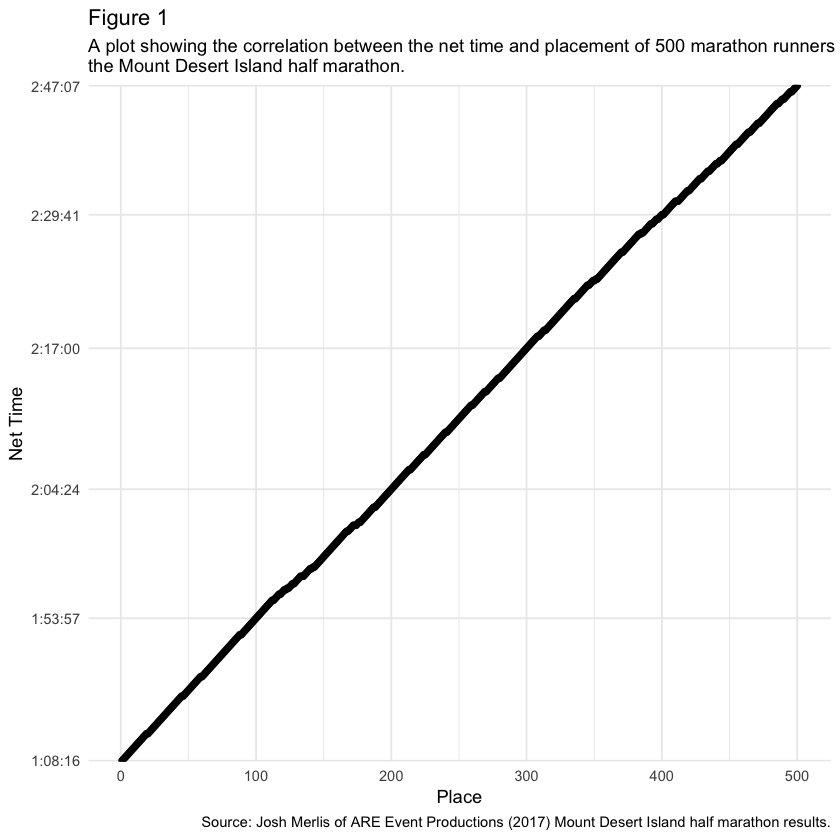

In [157]:
#9)
ggplot(data=marathonnew)+aes(Place,Net_Time)+geom_point()+
scale_y_discrete(breaks=c("1:08:16","1:53:57","2:04:24","2:17:00","2:29:41","2:47:07")) + #10)
labs(title = "Figure 1", 
     subtitle = "A plot showing the correlation between the net time and placement of 500 marathon runners in 
the Mount Desert Island half marathon.", y="Net Time", 
     caption="Source: Josh Merlis of ARE Event Productions (2017) Mount Desert Island half marathon results.") + #11)
theme_minimal() #applies a minimal theme to the figure (this was done for each proceeding figure as well)

**Results**  
The data follows a normal trend in Figure 1, as there is a positive relationship between place and net time, as expected. The shortest net time was around 1 hour and 8 minutes, and the longest net time was 2 hours and 47 minutes. The time to place ratio was not perfect 1 to 1, as the net time was much closer between the 250th and 500th place compared to the 1st to 250th. 
_________________________________________________
**Methods**  

*To determine the number of runners over the age of 50 for both genders, a bar plot with counts was created to see the proportion of those over 50 relative to the total number of male and female runners.*  
  
    12) Created a bar plot of the number of women vs men, and the proprotion within each sex of runners over the age of fifty. 
    13) The colour was modified to fit true (green4) vs false (using the totally not racist color, "indianred") and the   legend title was modified to "Over 50".


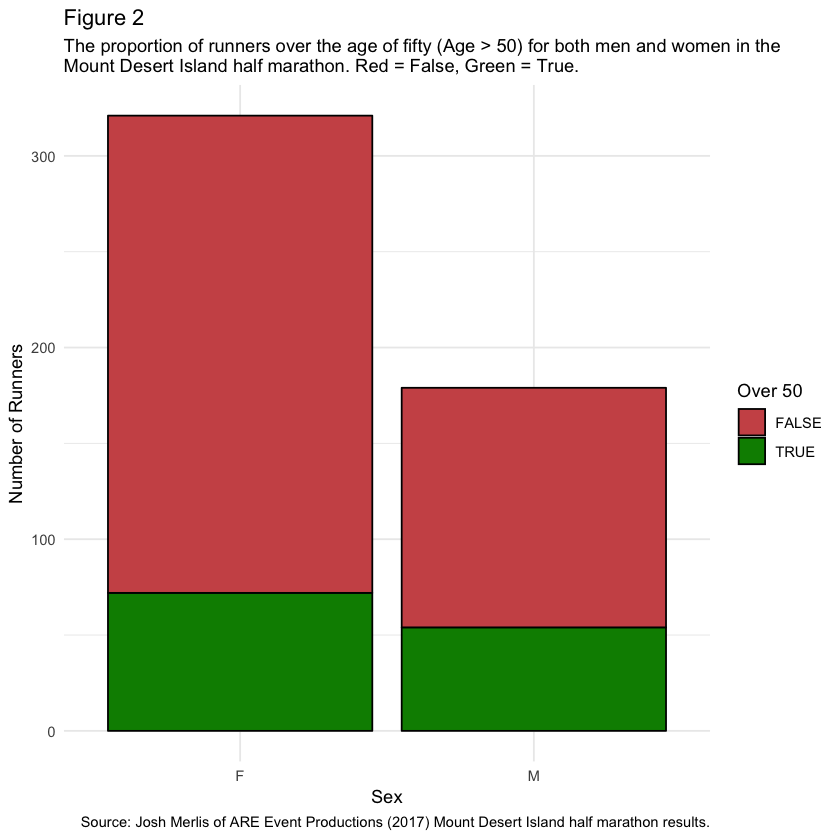

In [169]:
#12)
Fig2 = ggplot(data=marathonnew)+aes(Sex,fill=Age>50)+geom_bar(col="black")+
labs(title = "Figure 2", 
     subtitle = "The proportion of runners over the age of fifty (Age > 50) for both men and women in the 
Mount Desert Island half marathon. Red = False, Green = True.", 
    y="Number of Runners", 
caption="Source: Josh Merlis of ARE Event Productions (2017) Mount Desert Island half marathon results.") +
theme_minimal()

#13)
Fig2 + scale_fill_manual(values=c('indianred3','green4')) + guides(fill=guide_legend(title="Over 50"))

**Results**  
According to Figure 2, there were more female runners in the marathon than male runners. Additionally, the majority of the participants were under the age of 50 for both sexes. There were slightly more female runners over the age of 50 compared to male runners over the age of 50. However, because there were significantly more female participants, the proportion of runners over the age of 50 within each gender was larger in males than that for females.  
_____


**Methods**  

*To determine if high place runners were male or female, a bar plot was created with the proportion of male vs female runners within those that placed in the top 100.*  

    14) The top 100 places with the associated sex and age was indexed into three separate objects. 
    15) A dataframe was created using those indexed values, named top100df.
    16) A figure was created, plotting age and place for the top 100 runners. 
    17) The legend was modified in terms of color and title. 
    
    
    

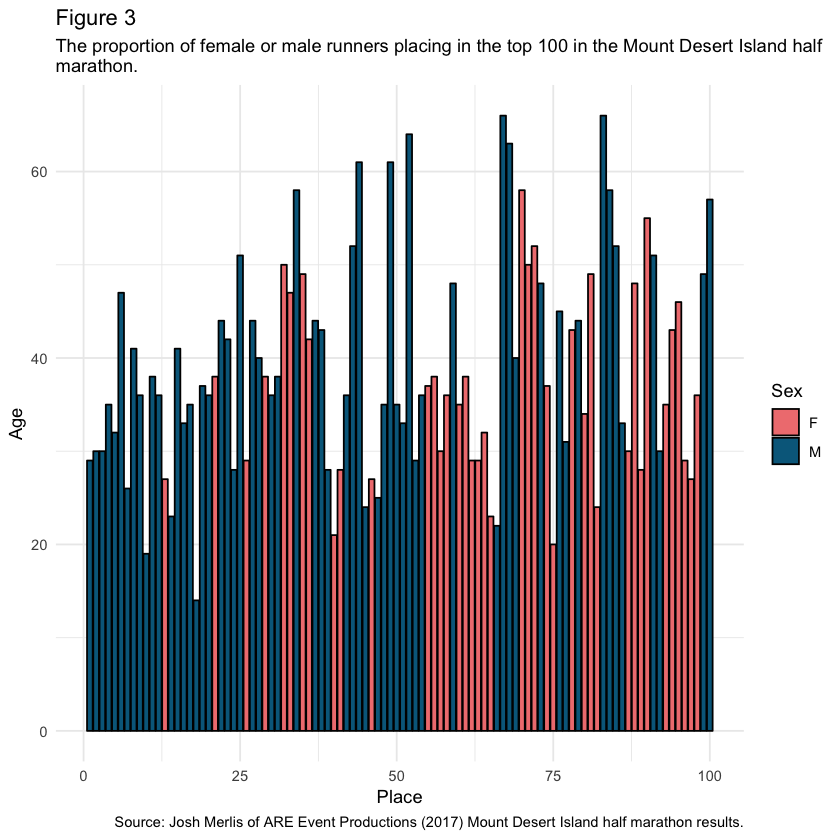

In [159]:
#14)
top100 = marathonnew$Place[1:100] #indexed first 100 Places
top100Sex = marathonnew$Sex[1:100] #indexed first 100 Sexes
top100Age = marathonnew$Age[1:100] #indexed first 100 Ages

#15)
top100df = data.frame(top100,top100Sex,top100Age) #dataframe of the first 100 finishers, with their sex and age

#16)
Fig4 = ggplot(data=top100df)+aes(top100,top100Age,fill=top100Sex)+geom_col(col="black")+
labs(title = "Figure 3", 
     subtitle = "The proportion of female or male runners placing in the top 100 in the Mount Desert Island half 
marathon.", 
y="Age", x="Place", 
caption="Source: Josh Merlis of ARE Event Productions (2017) Mount Desert Island half marathon results.")

#17)
Fig4 + scale_fill_manual(values=c('lightcoral','deepskyblue4'))+
guides(fill=guide_legend(title="Sex")) + theme_minimal()

**Results**  

The majority of the runners that placed in the top 100 were male, especially towards the top 50, according to Figure 3. Because of the significant difference in females that placed in the top 50 compared to the top 100, a second figure was created to look closer at this data. 
____

**Methods**  

*Figure 4:*  

    18) A new dataframe was created using the first 50 rows of Place, Sex, and Age.
    19) A barplot was created to see how age and sex affected placement.  
    
*Calculated means for age*  

    20) The mean age was taken for those in the top 50, 100, and the entire data set, and then put into a dataframe.

*Figure 5:*  

*To determine how age was distributed in the 500 runners, a barplot was plotted with frequency of age-related counts, with color indicating if the runner placed in the top 50 or not.*  
 
    21) Age was plotted in a barplot for frequency count, with green color meaning that the runner placed in the top 50.


Top_50,Top_100,Total
36.78,38.75,40.63


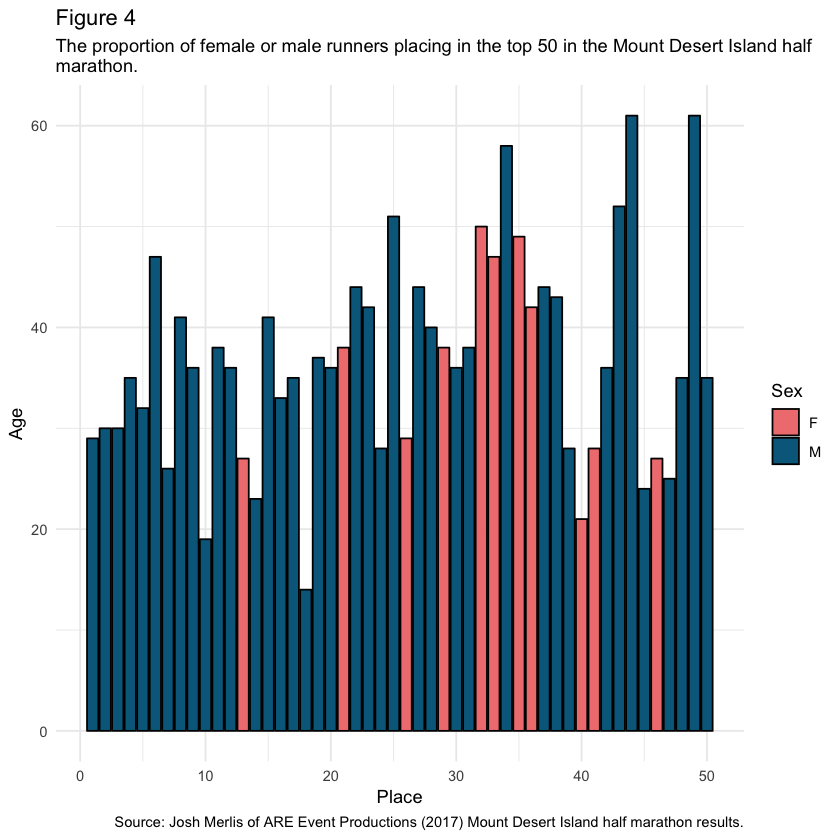

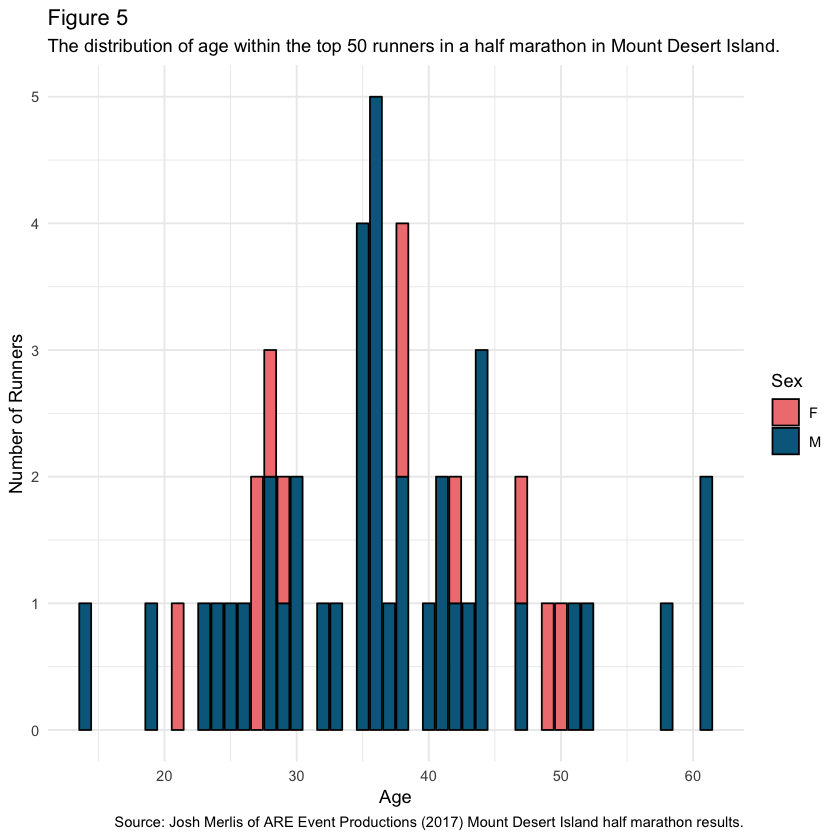

In [163]:
#18)
top50 = marathonnew$Place[1:50] #Top 50 Places
top50Sex = marathonnew$Sex[1:50] #Top 50 Sexes
top50Age = marathonnew$Age[1:50] #Top 50 Ages
top50df = data.frame(top50,top50Sex,top50Age) #Data frame of the top 50 runners

#19)
Fig4 = ggplot(data=top50df)+aes(top50,top50Age,fill=top50Sex)+geom_col(col="black")+ 
labs(title = "Figure 4", 
     subtitle = "The proportion of female or male runners placing in the top 50 in the Mount Desert Island half 
marathon.", 
y="Age", x="Place", 
caption="Source: Josh Merlis of ARE Event Productions (2017) Mount Desert Island half marathon results.") +
theme_minimal()
Fig4 + scale_fill_manual(values=c('lightcoral','deepskyblue4'))+
guides(fill=guide_legend(title="Sex"))

#20)
Top_50 = mean(top50df$top50Age) #Top 50 mean Age
Top_100 = mean(top100df$top100Age) #Top 100 mean Age
Total = mean(marathonnew$Age) #Entire data set mean Age
mean_age = data.frame(Top_50,Top_100,Total) #dataframe of the mean ages
mean_age
#21)
Fig5 = ggplot(top50df, aes(x=top50Age,fill=top50Sex)) + geom_bar(col="black")+
labs(title = "Figure 5", 
     subtitle = "The distribution of age within the top 50 runners in a half marathon in Mount Desert Island.",
     caption="Source: Josh Merlis of ARE Event Productions (2017) Mount Desert Island half marathon results.", 
     x="Age", y="Number of Runners")
Fig5 + scale_fill_manual(values=c('lightcoral','deepskyblue4')) + 
guides(fill=guide_legend(title="Sex")) + theme_minimal()

**Results**  

Similarly with Figure 3, there were more men in the top 50 placed runners than women, however this difference was more significant in the top 50, compared to the top 100. The highest placing woman was 13th place (Figure 4). Additionally, the older individuals placed later compared to the younger ones.   

The average age increased when looking at the top 50 versus top 100 runners, going from around 37 years to 39 years, respectively. The average age for the 500 runners was about 41 years old.  


The oldest age that placed in the top 50 was 61 and the youngest 14 (Figure 5). There was a wide distribution in age in the top 50. The distribution was similar to that of a bell curve, with the majority of the runners being 36 years old, with the younger and older ages placing less frequently within the top 50. 
___

**Methods**  

*To determine how age affects placement in marathon runners, age was plotted against placement. It was hypothesized that there would be a positive relationship between the two.*  

    21) The placement was plotted against age in point form, with color identifying sex. "Geom_smooth" inserts a     best fit line into the figure. 


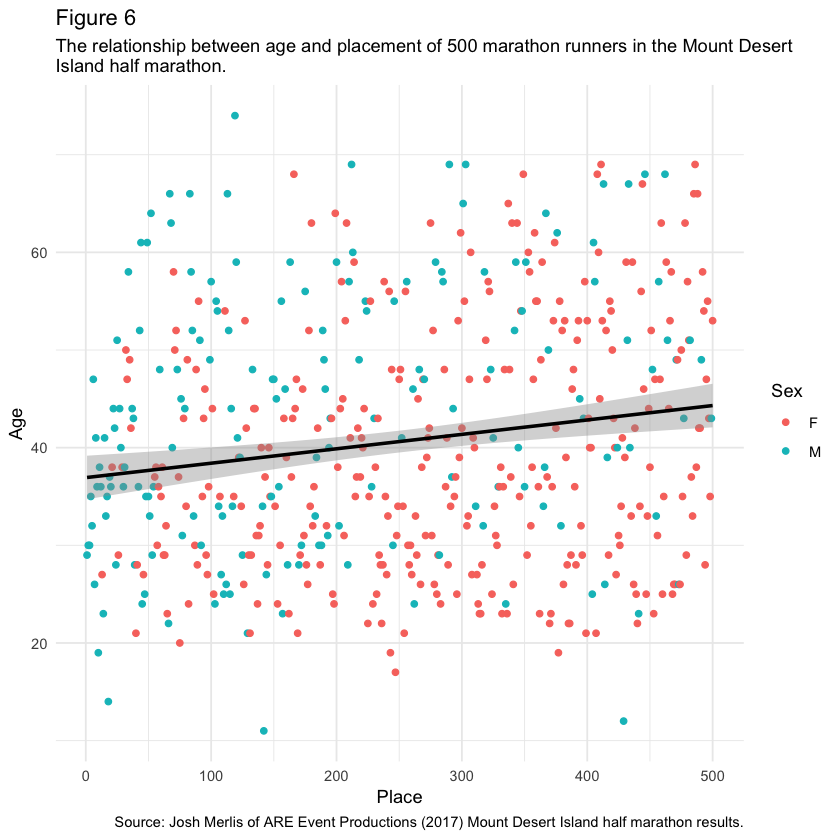

In [165]:
#21)
ggplot(data=marathonnew)+aes(Place,Age,colour=Sex)+geom_point()+
geom_smooth(method="lm", col="Black")+
labs(title = "Figure 6", 
     subtitle = "The relationship between age and placement of 500 marathon runners in the Mount Desert 
Island half marathon.",
caption="Source: Josh Merlis of ARE Event Productions (2017) Mount Desert Island half marathon results.")+
theme_minimal() 

**Results**  

There does not appear to be a strong relationship between Age and Placement when looking at all 500 runners, judging by the best fit line, which does not support the original hypothesis. The oldest runner placed within the top 100, whereas one of the youngest placed between 400 and 500.
___


**Methods**  

*How age affects male and female marathon runners*   

    22) Plotted Place and Age in a scatterplot, with color identifying gender. Place was resricted to the top 100 runners by using the command "scale_x_continuous".
     

Warning message:
“Removed 400 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 400 rows containing missing values (geom_point).”

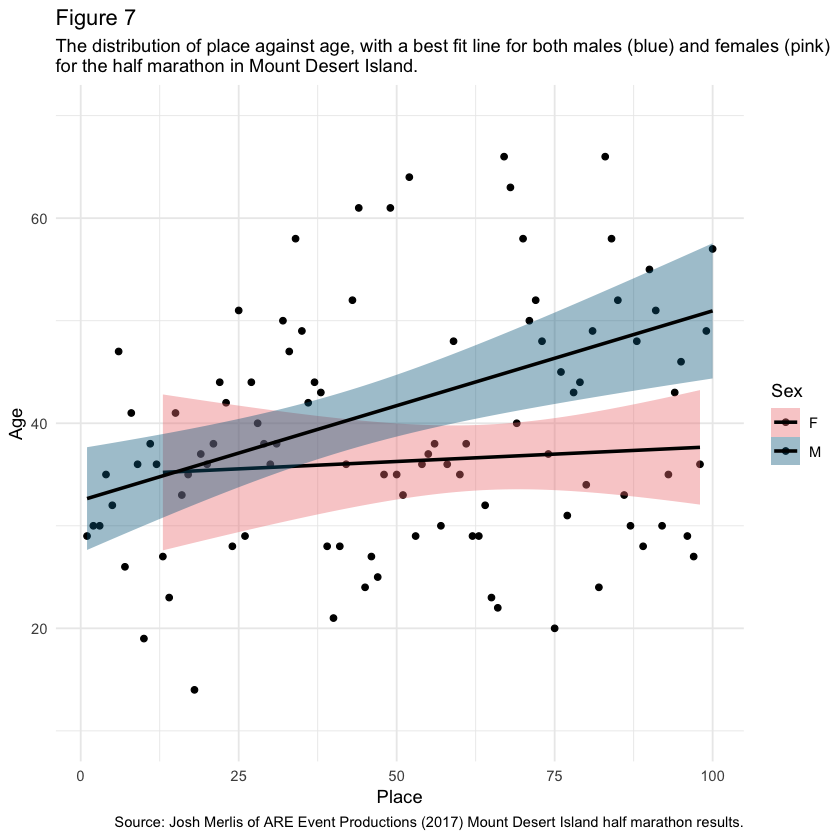

In [166]:
#22)
Fig8 = ggplot(data=marathonnew)+aes(Place,Age,fill=Sex)+geom_point()+
scale_y_continuous(limits=c(10,70))+
scale_x_continuous(limits = c(1,100))+
geom_smooth(method="lm", col="Black")+
labs(title = "Figure 7", 
     subtitle = "The distribution of place against age, with a best fit line for both males (blue) and females (pink) 
for the half marathon in Mount Desert Island.",
caption="Source: Josh Merlis of ARE Event Productions (2017) Mount Desert Island half marathon results.")

Fig8 + scale_fill_manual(values=c('lightcoral','deepskyblue4')) + 
 theme_minimal()

**Results**  
In Figure 7, the best fit line for men suggests that there is a stronger influence on age in placement in males, compared to females within the top 100 placed. 

**Methods**  

*Distribution of Age associated with Sex*  

    23) Age was used in a column figure with gender indentified by column color.  

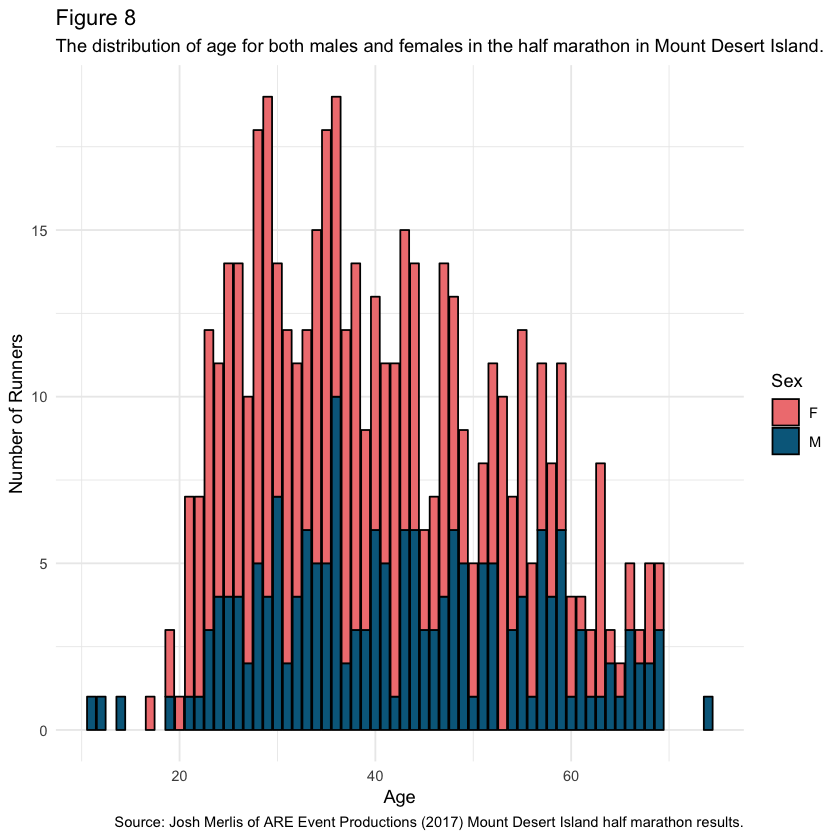

In [168]:
#23)
Fig8 = ggplot(data=marathonnew) + geom_bar(aes(Age,fill=Sex), col="black")+
theme_minimal() +
labs(title = "Figure 8", 
     subtitle = "The distribution of age for both males and females in the half marathon in Mount Desert Island.",
     caption="Source: Josh Merlis of ARE Event Productions (2017) Mount Desert Island half marathon results.", 
y = "Number of Runners")

Fig8 + scale_fill_manual(values=c('lightcoral','deepskyblue4'))

**Results**  

The distribution of age for males was more uniform compared to females (Figure 8). The distribution was skewed to the left for women, with the majority being between 28 and 36 years old. Both the oldest and youngest runners were men, and the data was less skewed compared to the women. 

**Discussion**  

To determine the validity of historical stereotypes for female and older athletes, the marathon data from Mount Desert Island, Maine was critically assessed.  

*Gender*  
	Gender does appear to play a role in the placement of marathon runners, especially when looking at the top 50 (Figure 4). There was a much larger proportion of males placing in the top 50, suggesting that a gender gap at the beginning. Towards the end, there appeared to be more females (Figure 6), however, this could also be attributed to the larger proportion of females in the marathon compared to males (Figure 2). There also appeared to be more females in the middle places, around 200-300, however this could also be attributed to the difference in participants. This supports previous research, as most of the males finished earlier than the females (Sparling et al. 1998). However, the hypothesis that the lower ranking runners would have a similar proportion of men and women was supported by Figure 6, as there was a less significant difference in the placement between men and women.  

*Age*  
	There was a larger proportion of runners under the age of 50 for both genders, as expected (Figure 2). Previous research on age and marathons has found that there are more runners between the ages of 25 to 34 than any other age group (Connick 2015). This was similar to the results found in Figure 8, as the majority of the runners were between approximately 28 and 36 years old. Figure 6 suggests that there is a slight trend in increasing age and place, as age increases, place does as well. This supports the findings of Leyk et al. (2007). In the top 50 runners, the most frequent age was found to be 36, suggesting that it may be the peak age for performance. The oldest runners in the top 50 were 61 (Figure 5). This was a surprising finding, however it was also an exception, as the majority of the runners were between ages 37 and 45, and the two runners placed in the last 5 places of the top 50. This suggests that age does affect placement. Additionally, the average age increased with marathon place, supporting the original hypothesis that age negatively affects performance.   

*Age and Gender*  
	In the top 100 runners, there was a less significant trend of decreased place with increased age in the females (Figure 7). However, this is likely due to the smaller range in ages within the females compared to the males. The hypothesis that there is a lower proportion of older women compared to men was supported by Figure 8. The age distribution was much more even for males compared to females, agreeing with the results of Hunter and Stevens (2013).  

*Conclusions*  
    Overall, age and gender clearly play a role in the placement of both men and women in marathons. Women typically placed worse than men, especially in the top 50 runners. The distribution of age was more uniform for men than women, suggesting that men are less affected by increasing age as they also performed slightly better than women on average. this validates several of the stereotypes we have, but demonstrates that although women and older individuals may place later than younger men, they were still present in the top 50, well before many of the other younger men. The implicit biases we hold are only accurate for the top 12 runners, in reality (Figure 12). 


**References**  
Connick MJ, Beckman EM, Tweedy SM (2015) Relative age affects marathon performance in male and female athletes. Journal of Sports Science and Medicine 14:669-674  

Hunter SK, Stevens AA (2013) Sex differences in marathon running with advanced age: physiology or participation? Medicine & Science in Sports & Exercise 45:148-156  

Leyk D, Erly O, Ridder D, Leurs M, Rüther T, Wunderlich M, Sievert A, Baum K, Essfeld D (2007) Age-related changes in marathon and half-marathon performances. International Journal of Sports Medicine 28:513-517  

Sparling PB, O’Donnell EM, Snow TK (1998) The gender difference in distance running performance has plateaued: an analysis of world rankings from 1980 to 1996. Medicine & Science in Sports & Exercise 30:1725-1729  


Data was from the Mount Desert Island half marathon, collected and created by Josh Merlis of ARE Event Productions (2017) at http://www.areep.com/results/live/overall.php?eid=37&rid=79&page=2 
